In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


## inTimeMuon

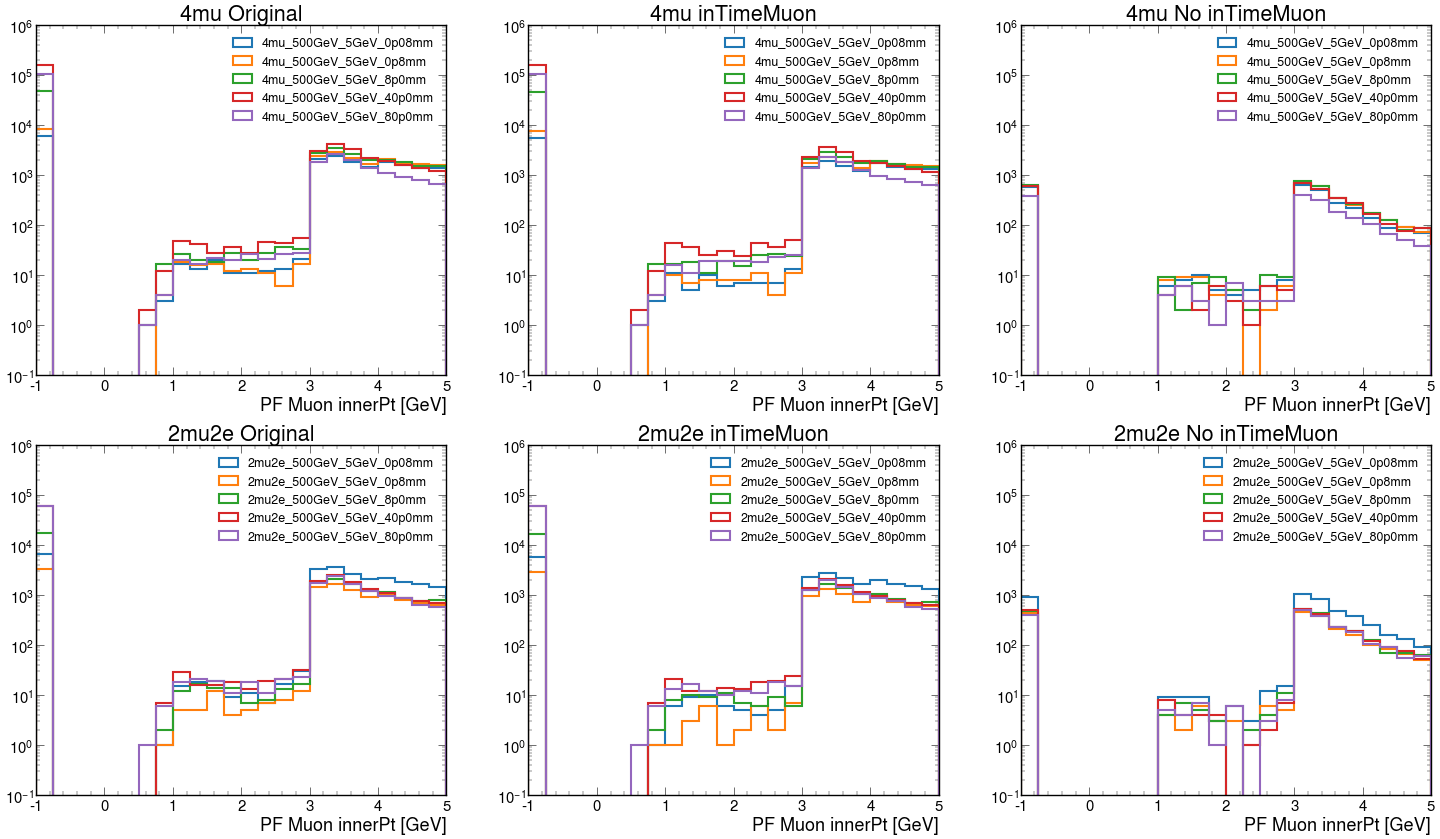

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].innerPt
    evt2 = events_2mu2e[i_2mu].innerPt    
    mask1 = (events_4mu[i_4mu].inTimeMuon == False)
    mask2 = (events_2mu2e[i_2mu].inTimeMuon == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].inTimeMuon]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].inTimeMuon]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-1,5)
ax[0][1].set_xlim(-1,5)
ax[0][2].set_xlim(-1,5)
ax[1][0].set_xlim(-1,5)
ax[1][1].set_xlim(-1,5)
ax[1][2].set_xlim(-1,5)

ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)

ax[0][0].set_xlabel('PF Muon innerPt [GeV]')
ax[0][1].set_xlabel('PF Muon innerPt [GeV]')
ax[0][2].set_xlabel('PF Muon innerPt [GeV]')
ax[1][0].set_xlabel('PF Muon innerPt [GeV]')
ax[1][1].set_xlabel('PF Muon innerPt [GeV]')
ax[1][2].set_xlabel('PF Muon innerPt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu inTimeMuon')
ax[0][2].set_title('4mu No inTimeMuon')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e inTimeMuon')
ax[1][2].set_title('2mu2e No inTimeMuon')

plt.savefig("../Plots/Test/Boolean/inTimeMuon_innerPt.png", bbox_inches="tight")

## isGlobal

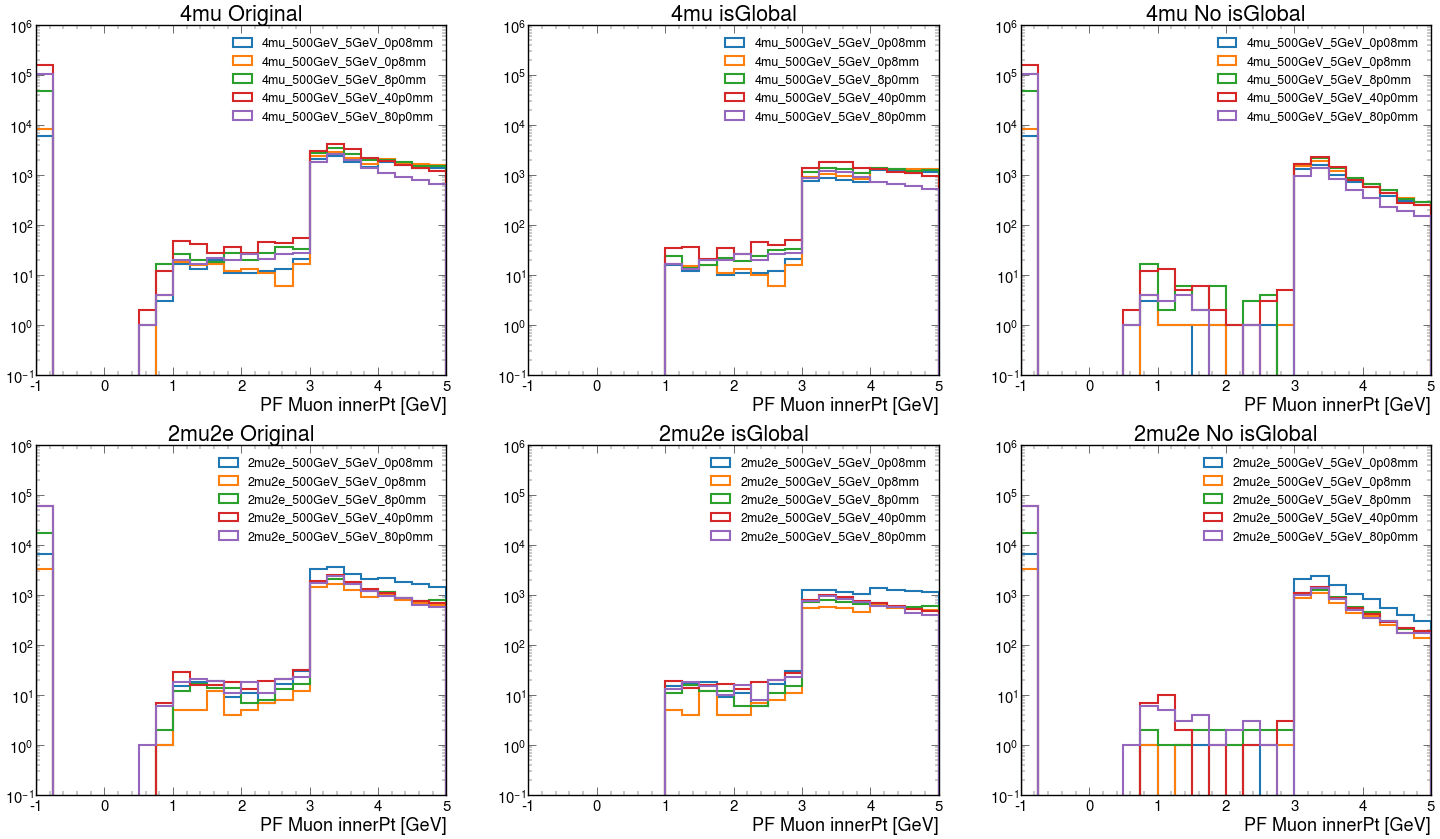

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].innerPt
    evt2 = events_2mu2e[i_2mu].innerPt    
    mask1 = (events_4mu[i_4mu].isGlobal == False)
    mask2 = (events_2mu2e[i_2mu].isGlobal == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isGlobal]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isGlobal]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-1,5)
ax[0][1].set_xlim(-1,5)
ax[0][2].set_xlim(-1,5)
ax[1][0].set_xlim(-1,5)
ax[1][1].set_xlim(-1,5)
ax[1][2].set_xlim(-1,5)

ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)

ax[0][0].set_xlabel('PF Muon innerPt [GeV]')
ax[0][1].set_xlabel('PF Muon innerPt [GeV]')
ax[0][2].set_xlabel('PF Muon innerPt [GeV]')
ax[1][0].set_xlabel('PF Muon innerPt [GeV]')
ax[1][1].set_xlabel('PF Muon innerPt [GeV]')
ax[1][2].set_xlabel('PF Muon innerPt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isGlobal')
ax[0][2].set_title('4mu No isGlobal')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isGlobal')
ax[1][2].set_title('2mu2e No isGlobal')

plt.savefig("../Plots/Test/Boolean/isGlobal_innerPt.png", bbox_inches="tight")

## isPFcand

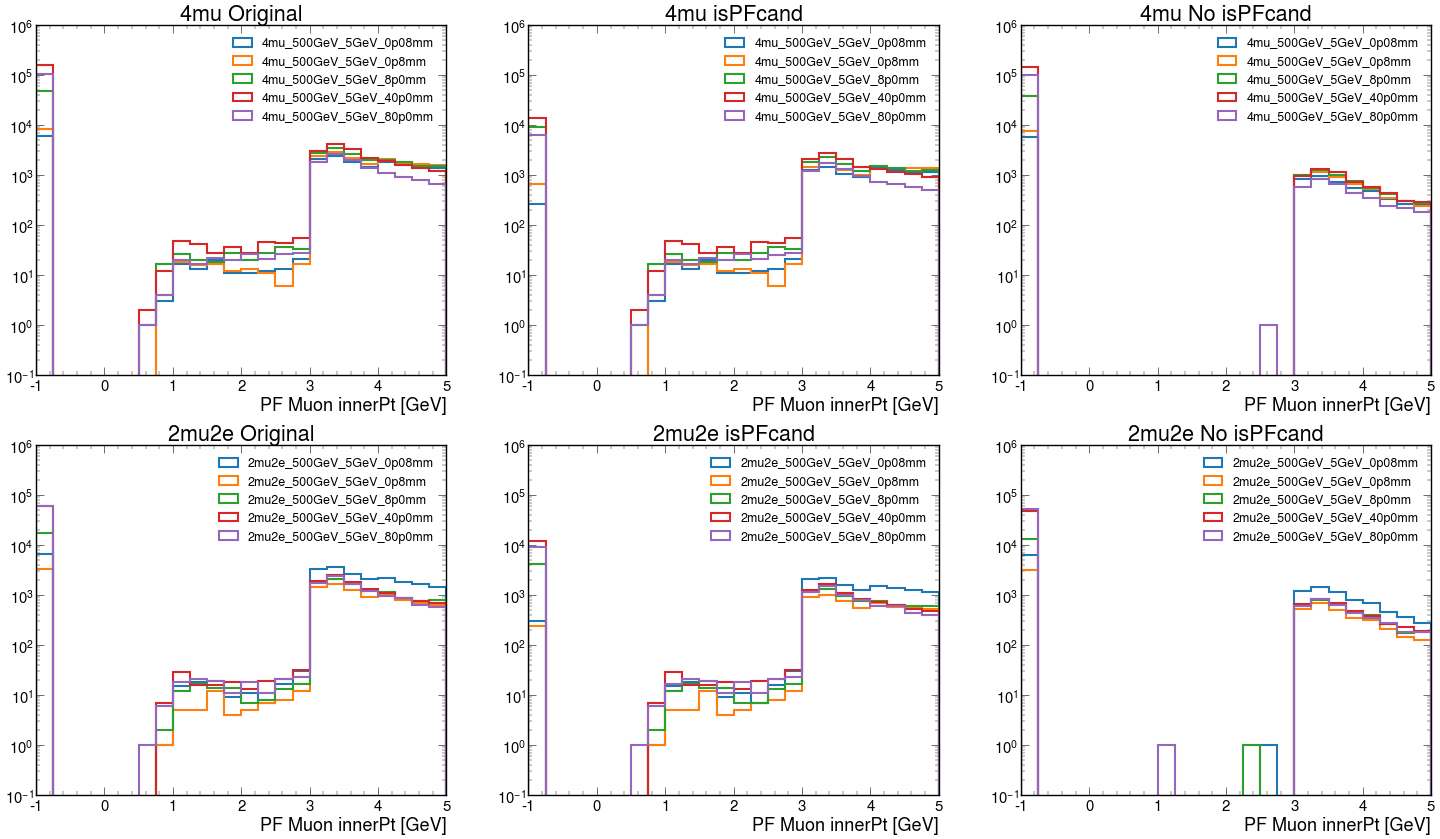

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].innerPt
    evt2 = events_2mu2e[i_2mu].innerPt    
    mask1 = (events_4mu[i_4mu].isPFcand == False)
    mask2 = (events_2mu2e[i_2mu].isPFcand == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isPFcand]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isPFcand]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-1,5)
ax[0][1].set_xlim(-1,5)
ax[0][2].set_xlim(-1,5)
ax[1][0].set_xlim(-1,5)
ax[1][1].set_xlim(-1,5)
ax[1][2].set_xlim(-1,5)

ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)

ax[0][0].set_xlabel('PF Muon innerPt [GeV]')
ax[0][1].set_xlabel('PF Muon innerPt [GeV]')
ax[0][2].set_xlabel('PF Muon innerPt [GeV]')
ax[1][0].set_xlabel('PF Muon innerPt [GeV]')
ax[1][1].set_xlabel('PF Muon innerPt [GeV]')
ax[1][2].set_xlabel('PF Muon innerPt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isPFcand')
ax[0][2].set_title('4mu No isPFcand')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isPFcand')
ax[1][2].set_title('2mu2e No isPFcand')

plt.savefig("../Plots/Test/Boolean/isPFcand_innerPt.png", bbox_inches="tight")

## isStandalone

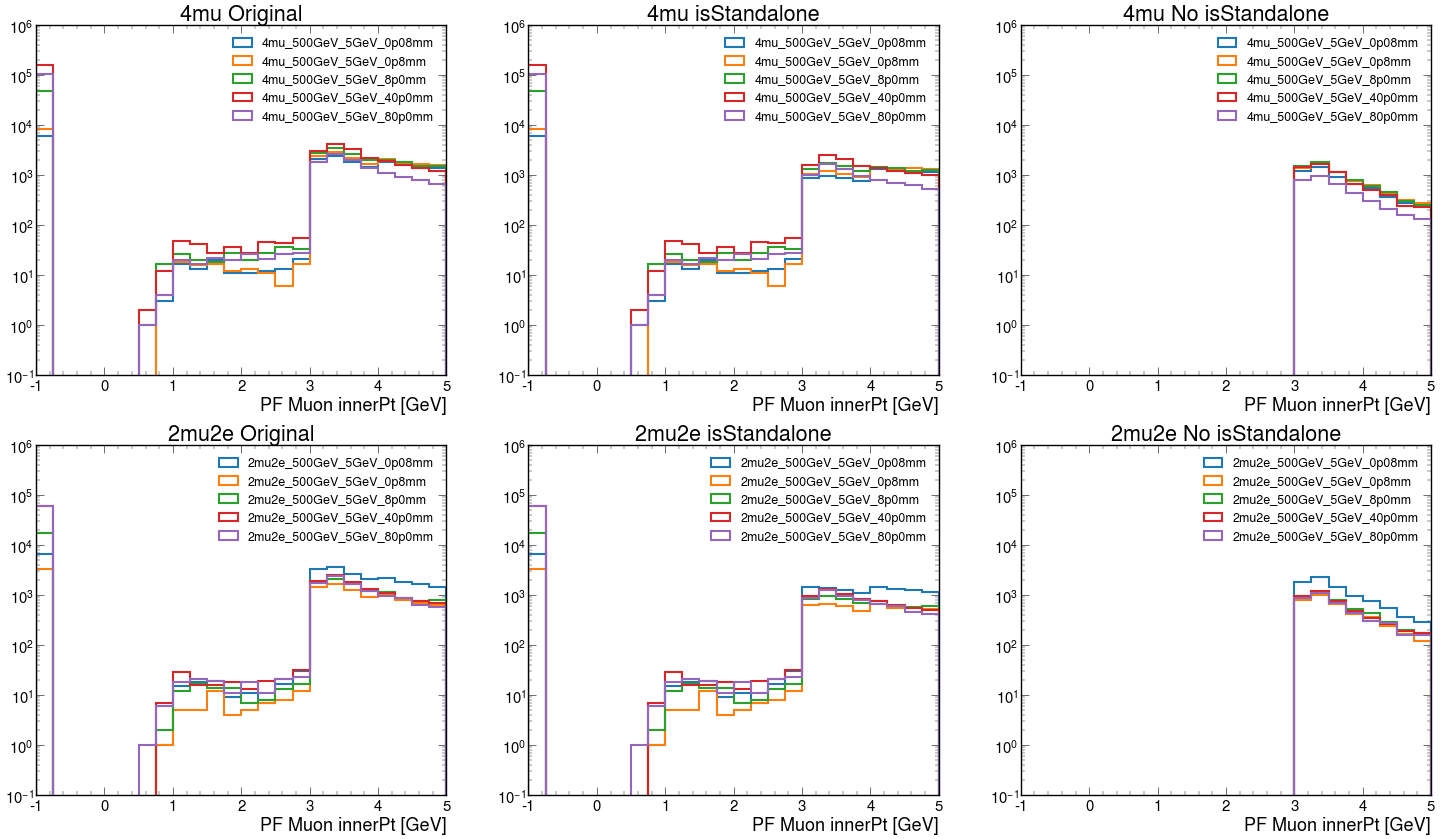

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].innerPt
    evt2 = events_2mu2e[i_2mu].innerPt    
    mask1 = (events_4mu[i_4mu].isStandalone == False)
    mask2 = (events_2mu2e[i_2mu].isStandalone == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isStandalone]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isStandalone]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-1,5)
ax[0][1].set_xlim(-1,5)
ax[0][2].set_xlim(-1,5)
ax[1][0].set_xlim(-1,5)
ax[1][1].set_xlim(-1,5)
ax[1][2].set_xlim(-1,5)

ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)

ax[0][0].set_xlabel('PF Muon innerPt [GeV]')
ax[0][1].set_xlabel('PF Muon innerPt [GeV]')
ax[0][2].set_xlabel('PF Muon innerPt [GeV]')
ax[1][0].set_xlabel('PF Muon innerPt [GeV]')
ax[1][1].set_xlabel('PF Muon innerPt [GeV]')
ax[1][2].set_xlabel('PF Muon innerPt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isStandalone')
ax[0][2].set_title('4mu No isStandalone')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isStandalone')
ax[1][2].set_title('2mu2e No isStandalone')

plt.savefig("../Plots/Test/Boolean/isStandalone_innerPt.png", bbox_inches="tight")

## isTracker

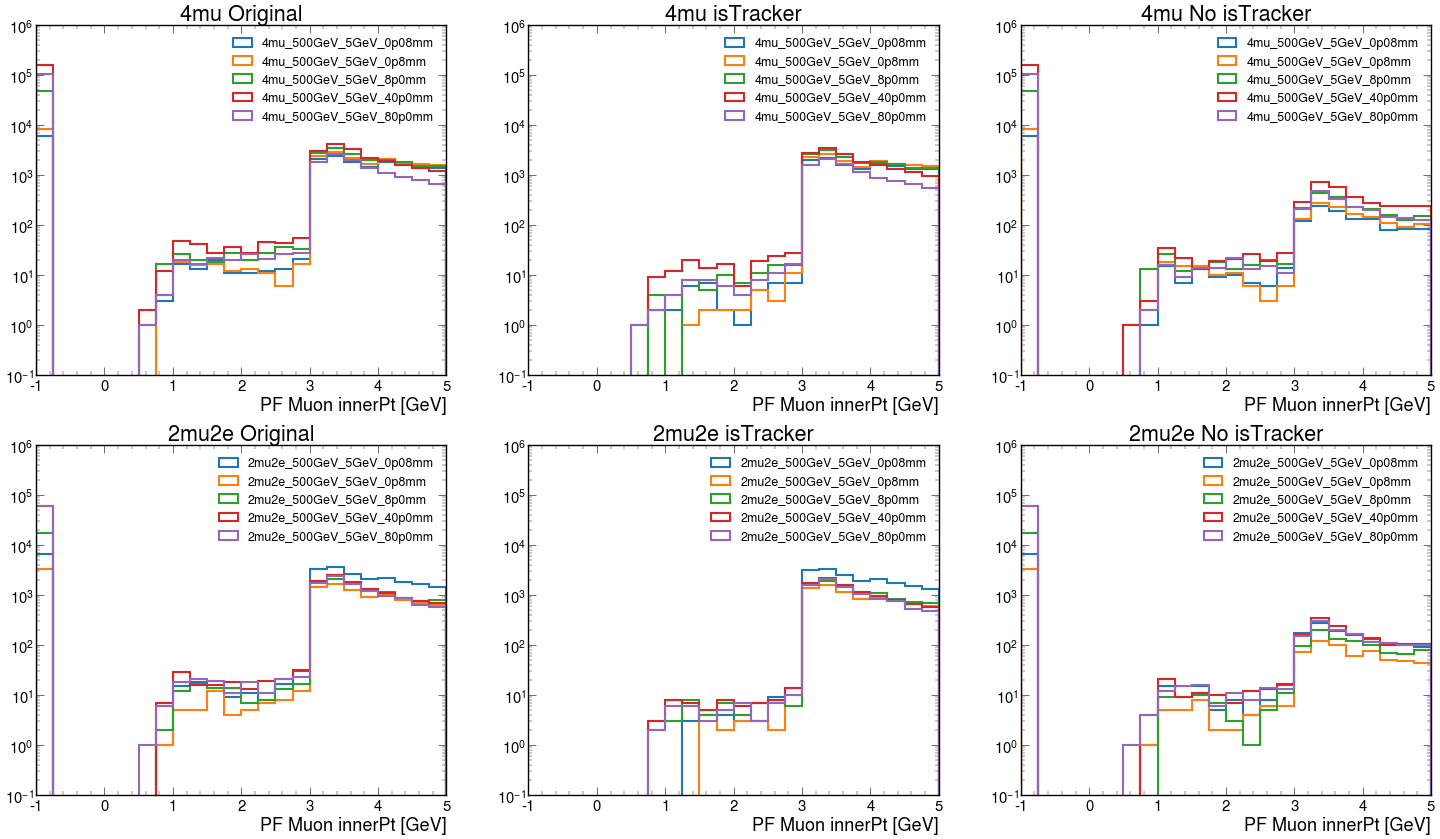

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].innerPt
    evt2 = events_2mu2e[i_2mu].innerPt    
    mask1 = (events_4mu[i_4mu].isTracker == False)
    mask2 = (events_2mu2e[i_2mu].isTracker == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isTracker]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isTracker]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-1,5), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-1,5)
ax[0][1].set_xlim(-1,5)
ax[0][2].set_xlim(-1,5)
ax[1][0].set_xlim(-1,5)
ax[1][1].set_xlim(-1,5)
ax[1][2].set_xlim(-1,5)

ax[0][0].set_ylim(0.1,1000000)
ax[0][1].set_ylim(0.1,1000000)
ax[0][2].set_ylim(0.1,1000000)
ax[1][0].set_ylim(0.1,1000000)
ax[1][1].set_ylim(0.1,1000000)
ax[1][2].set_ylim(0.1,1000000)

ax[0][0].set_xlabel('PF Muon innerPt [GeV]')
ax[0][1].set_xlabel('PF Muon innerPt [GeV]')
ax[0][2].set_xlabel('PF Muon innerPt [GeV]')
ax[1][0].set_xlabel('PF Muon innerPt [GeV]')
ax[1][1].set_xlabel('PF Muon innerPt [GeV]')
ax[1][2].set_xlabel('PF Muon innerPt [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isTracker')
ax[0][2].set_title('4mu No isTracker')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isTracker')
ax[1][2].set_title('2mu2e No isTracker')

plt.savefig("../Plots/Test/Boolean/isTracker_innerPt.png", bbox_inches="tight")

In [10]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


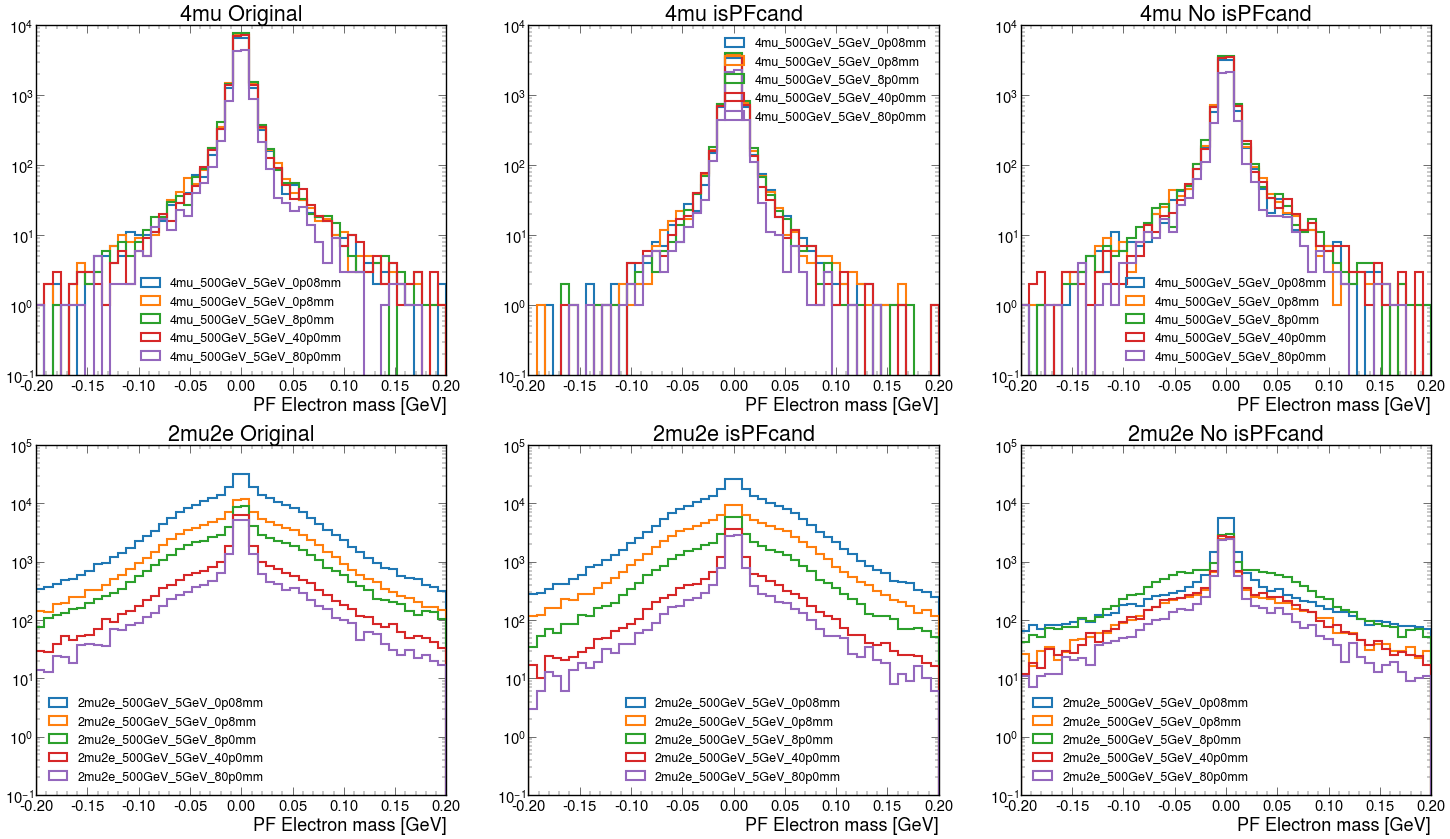

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    evt1 = events_4mu[i_4mu].mass
    evt2 = events_2mu2e[i_2mu].mass    
    mask1 = (events_4mu[i_4mu].isPFcand == False)
    mask2 = (events_2mu2e[i_2mu].isPFcand == False)
    
    ax[0][0].hist(ak.flatten(evt1), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][1].hist(ak.flatten(evt1[events_4mu[i_4mu].isPFcand]), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[0][2].hist(ak.flatten(evt1[mask1]), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    
    ax[1][0].hist(ak.flatten(evt2), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][1].hist(ak.flatten(evt2[events_2mu2e[i_2mu].isPFcand]), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    ax[1][2].hist(ak.flatten(evt2[mask2]), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

    
ax[0][0].set_xlim(-0.2,0.2)
ax[0][1].set_xlim(-0.2,0.2)
ax[0][2].set_xlim(-0.2,0.2)
ax[1][0].set_xlim(-0.2,0.2)
ax[1][1].set_xlim(-0.2,0.2)
ax[1][2].set_xlim(-0.2,0.2)

ax[0][0].set_ylim(0.1,10000)
ax[0][1].set_ylim(0.1,10000)
ax[0][2].set_ylim(0.1,10000)
ax[1][0].set_ylim(0.1,100000)
ax[1][1].set_ylim(0.1,100000)
ax[1][2].set_ylim(0.1,100000)

ax[0][0].set_xlabel('PF Electron mass [GeV]')
ax[0][1].set_xlabel('PF Electron mass [GeV]')
ax[0][2].set_xlabel('PF Electron mass [GeV]')
ax[1][0].set_xlabel('PF Electron mass [GeV]')
ax[1][1].set_xlabel('PF Electron mass [GeV]')
ax[1][2].set_xlabel('PF Electron mass [GeV]')

ax[0][0].legend(fontsize=18)
ax[0][1].legend(fontsize=18)
ax[0][2].legend(fontsize=18)
ax[1][0].legend(fontsize=18)
ax[1][1].legend(fontsize=18)
ax[1][2].legend(fontsize=18)

ax[0][0].set_yscale("log")
ax[0][1].set_yscale("log")
ax[0][2].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")
ax[1][2].set_yscale("log")

ax[0][0].set_title('4mu Original')
ax[0][1].set_title('4mu isPFcand')
ax[0][2].set_title('4mu No isPFcand')
ax[1][0].set_title('2mu2e Original')
ax[1][1].set_title('2mu2e isPFcand')
ax[1][2].set_title('2mu2e No isPFcand')

plt.savefig("../Plots/Test/Boolean/isPFcand_emass.png", bbox_inches="tight")